# Swan Data

## Setup

In [1]:
# Libraries
from waveome import model_search
import pandas as pd
import matplotlib.pyplot as plt

## Data

In [2]:
df = pd.read_table('subset_data.txt').drop(columns=['index'])
df

,SEX,season,time,Zoogloea
0,0.0,0.0,32.0,39625.0
1,0.0,0.0,30.0,885552.0
2,1.0,0.0,70.0,905.0
3,0.0,1.0,1.0,24497.0
4,1.0,2.0,160.0,8806.0
...,...,...,...,...
201,2.0,1.0,2.0,29533.0
202,2.0,2.0,206.0,42851.0
203,1.0,1.0,2.0,14358.0
204,1.0,0.0,31.0,33514.0


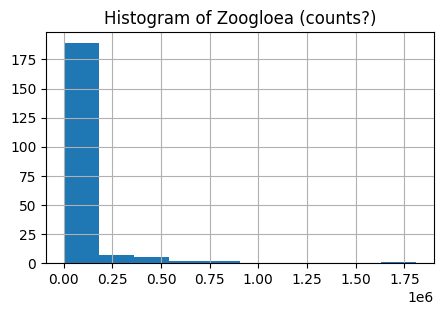

In [3]:
# Let's take a look at the distribution of the outcome
(
    df['Zoogloea']
    .hist(figsize=(5, 3))
    .set_title('Histogram of Zoogloea (counts?)')
)
plt.show()

## Waveome

In [4]:
# Load GP object
gps = model_search.GPSearch(
    X=df[['SEX', 'season', 'time']],
    Y=pd.DataFrame(df['Zoogloea']),
    categorical_vars=['SEX', 'season'],
    outcome_likelihood='zeroinflated_negativebinomial',
)

# Now search over possible model combinations
# Setting the number of iterations lower to make the notebook faster
gps.run_penalized_search(
    optimization_options={'num_opt_iter': 1000},
    num_jobs=6, 
    random_seed=9102
)

GPSearch:   7%|▋         | 1/15 [00:33<07:55, 33.94s/it]

Optimization not converged after 1000 rounds
Optimization not converged after 1000 rounds
Optimization not converged after 1000 rounds


GPSearch:  27%|██▋       | 4/15 [00:35<01:15,  6.83s/it]

Optimization not converged after 1000 rounds
Optimization not converged after 1000 rounds
Optimization not converged after 1000 rounds


GPSearch:  47%|████▋     | 7/15 [01:03<01:05,  8.21s/it]

Optimization not converged after 1000 rounds
Optimization not converged after 1000 rounds
Optimization not converged after 1000 rounds


GPSearch:  67%|██████▋   | 10/15 [01:04<00:21,  4.36s/it]

Optimization not converged after 1000 rounds
Optimization not converged after 1000 rounds


GPSearch:  80%|████████  | 12/15 [01:05<00:08,  2.71s/it]

Optimization not converged after 1000 rounds


GPSearch:  87%|████████▋ | 13/15 [01:27<00:14,  7.49s/it]

Optimization not converged after 1000 rounds


GPSearch:  93%|█████████▎| 14/15 [01:27<00:05,  5.68s/it]

Optimization not converged after 1000 rounds
Optimization not converged after 1000 rounds


GPSearch: 100%|██████████| 15/15 [02:02<00:00,  8.15s/it]

Optimization not converged after 1000 rounds


In [5]:
# Continue to optimize model
gps.models['Zoogloea'].optimize_params()

Optimization not converged after 5000 rounds


In [6]:
# Take a look at the model
gps.models['Zoogloea']

name,class,transform,prior,trainable,shape,dtype,value
PSVGP.mean_function.c,Parameter,Identity,,True,"(1,)",float64,[-0.87955]
PSVGP.kernel.kernels[0].variance,Parameter,Softplus,Exponential,True,(),float64,0.0
PSVGP.kernel.kernels[1].variance,Parameter,Softplus,Exponential,True,(),float64,0.0
PSVGP.kernel.kernels[2].variance,Parameter,Softplus,Exponential,True,(),float64,0.01295
PSVGP.kernel.kernels[2].lengthscales,Parameter,Softplus,,True,(),float64,0.60272
PSVGP.kernel.kernels[3].kernels[0].variance,Parameter,Softplus,Exponential,True,(),float64,0.23189
PSVGP.kernel.kernels[3].kernels[1].variance,Parameter,Softplus,Exponential,True,(),float64,0.23189
PSVGP.kernel.kernels[3].kernels[1].lengthscales,Parameter,Softplus,,True,(),float64,0.09564
PSVGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,0.61811
PSVGP.likelihood.km,Parameter,Softplus,,True,(),float64,0.0


<Axes: >

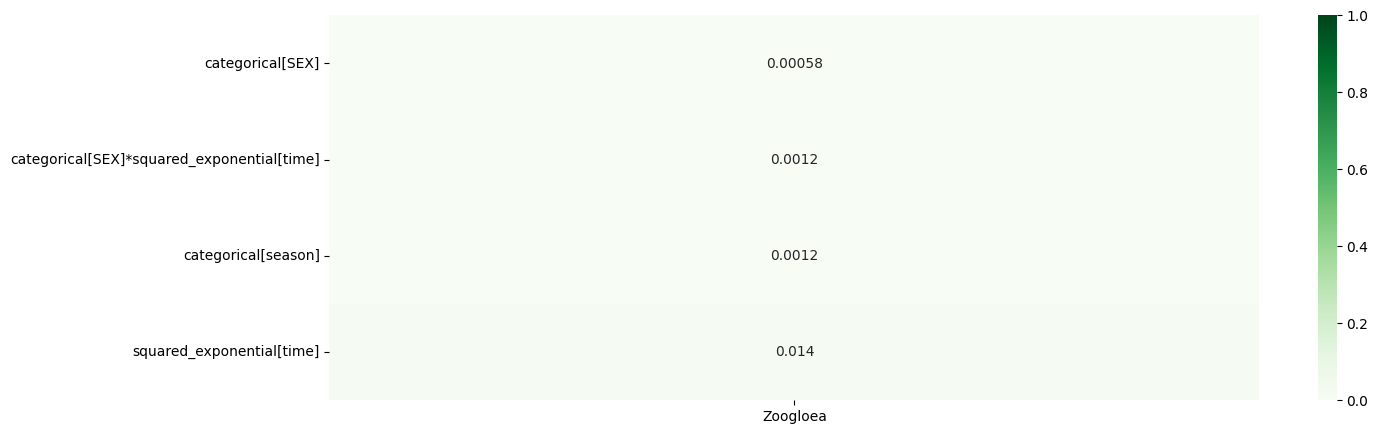

In [7]:
# This is not going to work because there is only one model
# gps.plot_heatmap(var_cutoff=0)

# Instead I added functionality to just plot a regular heatmat
gps.plot_heatmap(var_cutoff=0, cluster=False)

<Axes: xlabel='time'>

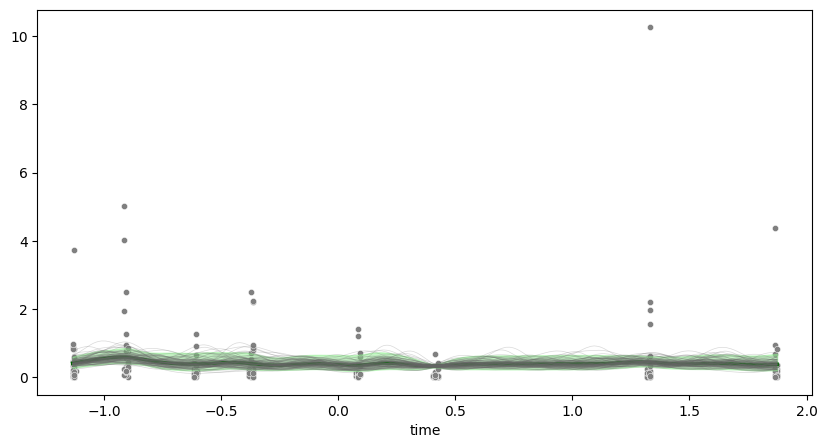

In [8]:
gps.plot_marginal(out_label='Zoogloea', x_axis_label='time')
# plt.yscale('log') # Feel free to uncomment this if you'd like
# Also WATCH OUT because we have scaled both the X and Y variables

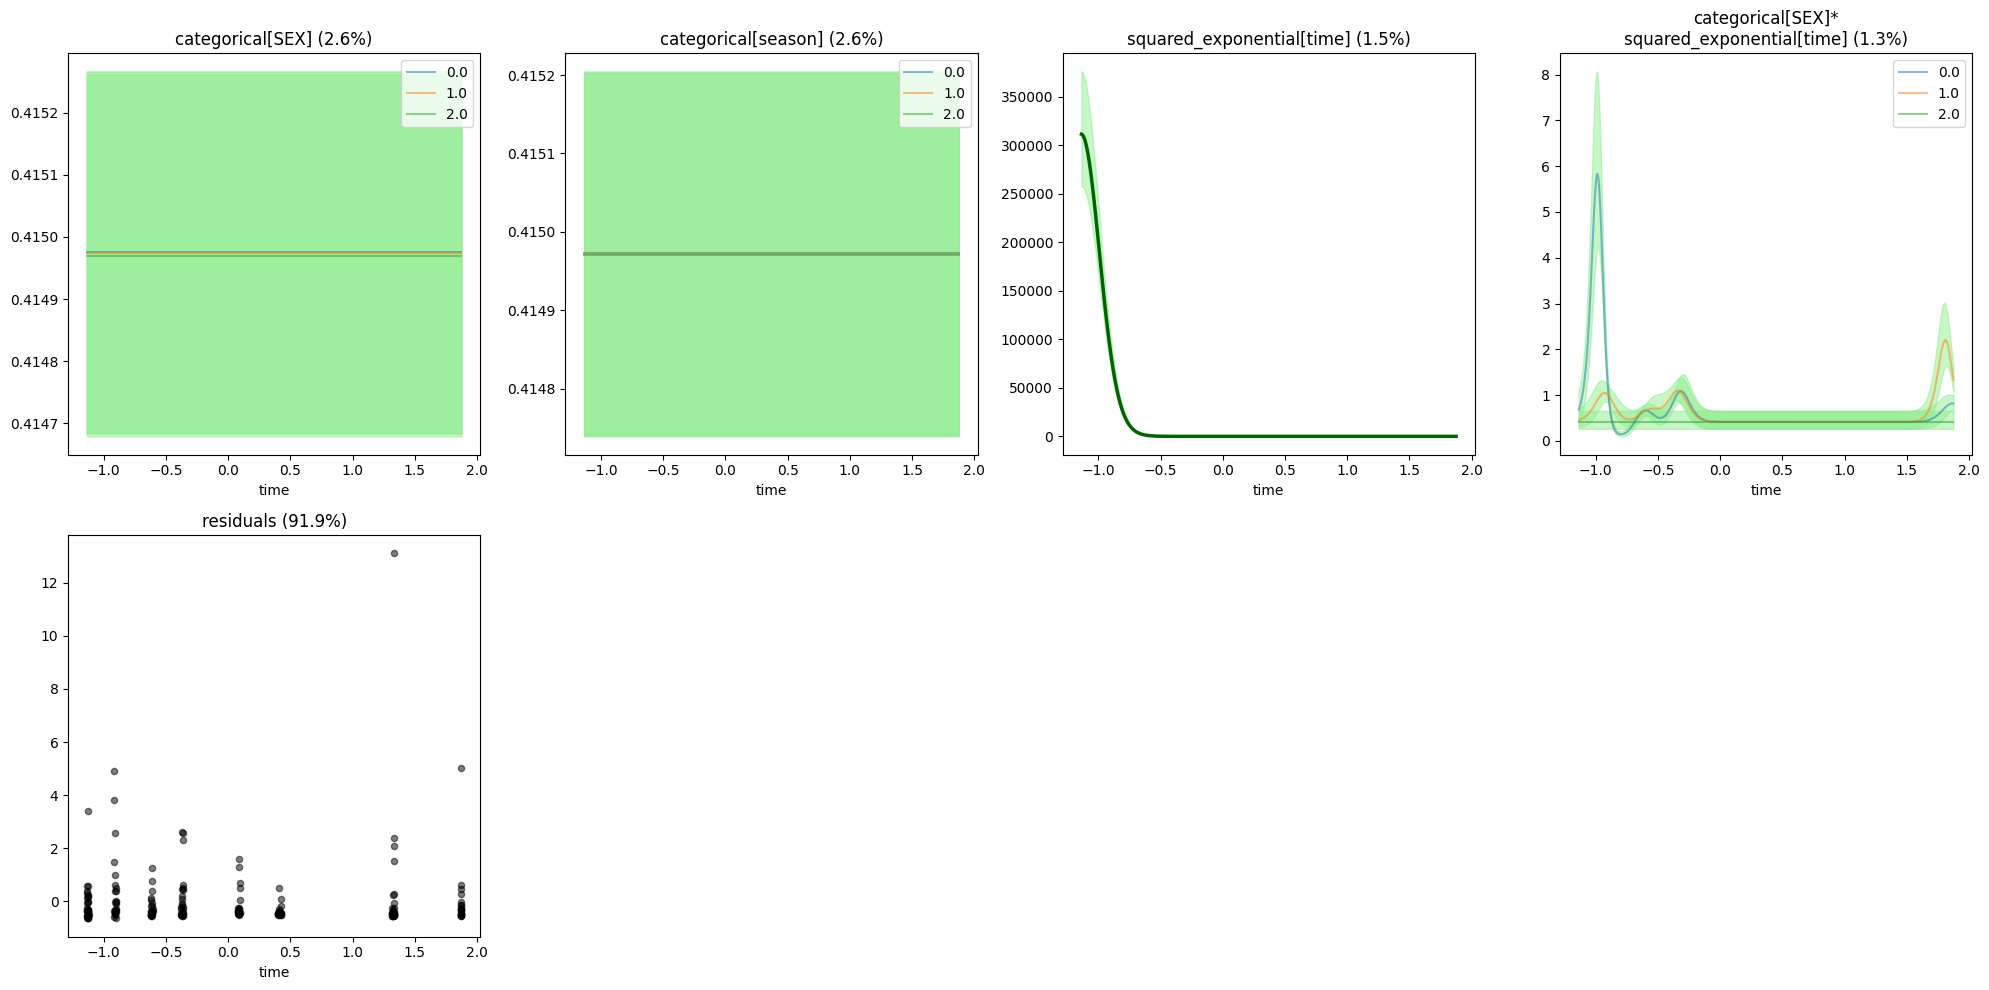

In [9]:
gps.plot_parts(out_label='Zoogloea', x_axis_label='time', sharey=False)
plt.tight_layout()

In [10]:
# Can also do this with a normal distribution likelihood if we would like 
import numpy as np
gps_normal = model_search.GPSearch(
    X=df[['SEX', 'season', 'time']],
    Y=pd.DataFrame(np.log(df['Zoogloea'])),
    categorical_vars=['SEX', 'season'],
    outcome_likelihood='gaussian',
    Y_transform='standardize'
)

# Now search over possible model combinations
# Setting the number of iterations lower to make the notebook faster
gps_normal.run_penalized_search(
    optimization_options={'num_opt_iter': 1000}, 
    # search_options={'random_seed': 9102},
    num_jobs=6, 
    random_seed=9102
)

print(f"Penalization factor selected: {gps_normal.models['Zoogloea'].penalization_factor}")

GPSearch:   7%|▋         | 1/15 [00:25<05:56, 25.44s/it]

Optimization not converged after 1000 rounds
Optimization not converged after 1000 rounds


GPSearch:  20%|██        | 3/15 [00:25<01:20,  6.68s/it]

Optimization not converged after 1000 rounds


GPSearch:  27%|██▋       | 4/15 [00:26<00:51,  4.72s/it]

Optimization not converged after 1000 rounds
Optimization not converged after 1000 rounds


GPSearch:  40%|████      | 6/15 [00:27<00:20,  2.28s/it]

Optimization not converged after 1000 rounds


GPSearch:  47%|████▋     | 7/15 [00:52<01:16,  9.62s/it]

Optimization not converged after 1000 rounds
Optimization not converged after 1000 rounds


GPSearch:  60%|██████    | 9/15 [00:53<00:28,  4.70s/it]

Optimization not converged after 1000 rounds


GPSearch:  67%|██████▋   | 10/15 [00:53<00:17,  3.52s/it]

Optimization not converged after 1000 rounds


GPSearch:  73%|███████▎  | 11/15 [00:54<00:10,  2.56s/it]

Optimization not converged after 1000 rounds
Optimization not converged after 1000 rounds


GPSearch:  87%|████████▋ | 13/15 [01:15<00:15,  7.54s/it]

Optimization not converged after 1000 rounds


GPSearch:  93%|█████████▎| 14/15 [01:15<00:05,  5.34s/it]

Optimization not converged after 1000 rounds


GPSearch: 100%|██████████| 15/15 [01:15<00:00,  3.86s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.NaturalGradient` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.NaturalGradient`.


Optimization not converged after 1000 rounds


GPSearch: 100%|██████████| 15/15 [01:46<00:00,  7.10s/it]

Optimization not converged after 1000 rounds
Penalization factor selected: 0.0


In [11]:
gps_normal.models['Zoogloea']

name,class,transform,prior,trainable,shape,dtype,value
PSVGP.mean_function.c,Parameter,Identity,,True,"(1,)",float64,[-0.01252]
PSVGP.kernel.kernels[0].variance,Parameter,Softplus,,True,(),float64,0.0043
PSVGP.kernel.kernels[1].variance,Parameter,Softplus,,True,(),float64,0.00347
PSVGP.kernel.kernels[1].lengthscales,Parameter,Softplus,,True,(),float64,1.67953
PSVGP.kernel.kernels[2].kernels[0].variance,Parameter,Softplus,,True,(),float64,0.01718
PSVGP.kernel.kernels[2].kernels[1].variance,Parameter,Softplus,,True,(),float64,0.06458
PSVGP.kernel.kernels[2].kernels[1].lengthscales,Parameter,Softplus,,True,(),float64,5.85471
PSVGP.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.98345
PSVGP.inducing_variable.Z,Parameter,Identity,,False,"(206, 3)",float64,"[[0., 1., 1.31821..."
PSVGP.q_mu,Parameter,Identity,Normal,False,"(206, 1)",float64,[[-4.70000e-03...


<Axes: >

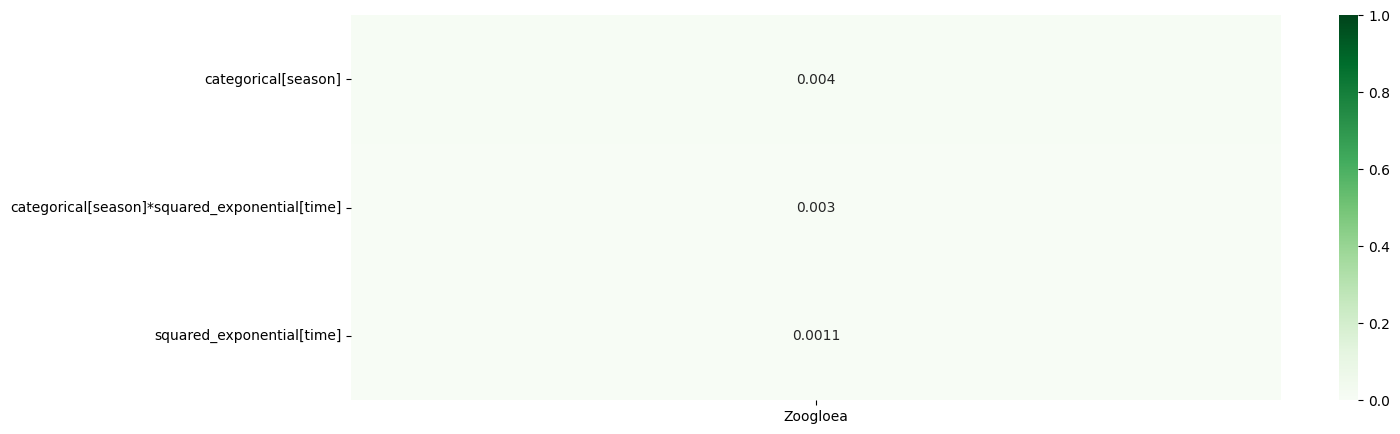

In [12]:
gps_normal.plot_heatmap(var_cutoff=0., cluster=False)

(<Figure size 2000x500 with 4 Axes>,
 array([[<Axes: title={'center': 'categorical[season] (1.5%)'}, xlabel='time'>,
         <Axes: title={'center': 'squared_exponential[time] (1.0%)'}, xlabel='time'>,
         <Axes: title={'center': 'categorical[season]*\nsquared_exponential[time] (2.1%)'}, xlabel='time'>,
         <Axes: title={'center': 'residuals (95.5%)'}, xlabel='time'>]],
       dtype=object))

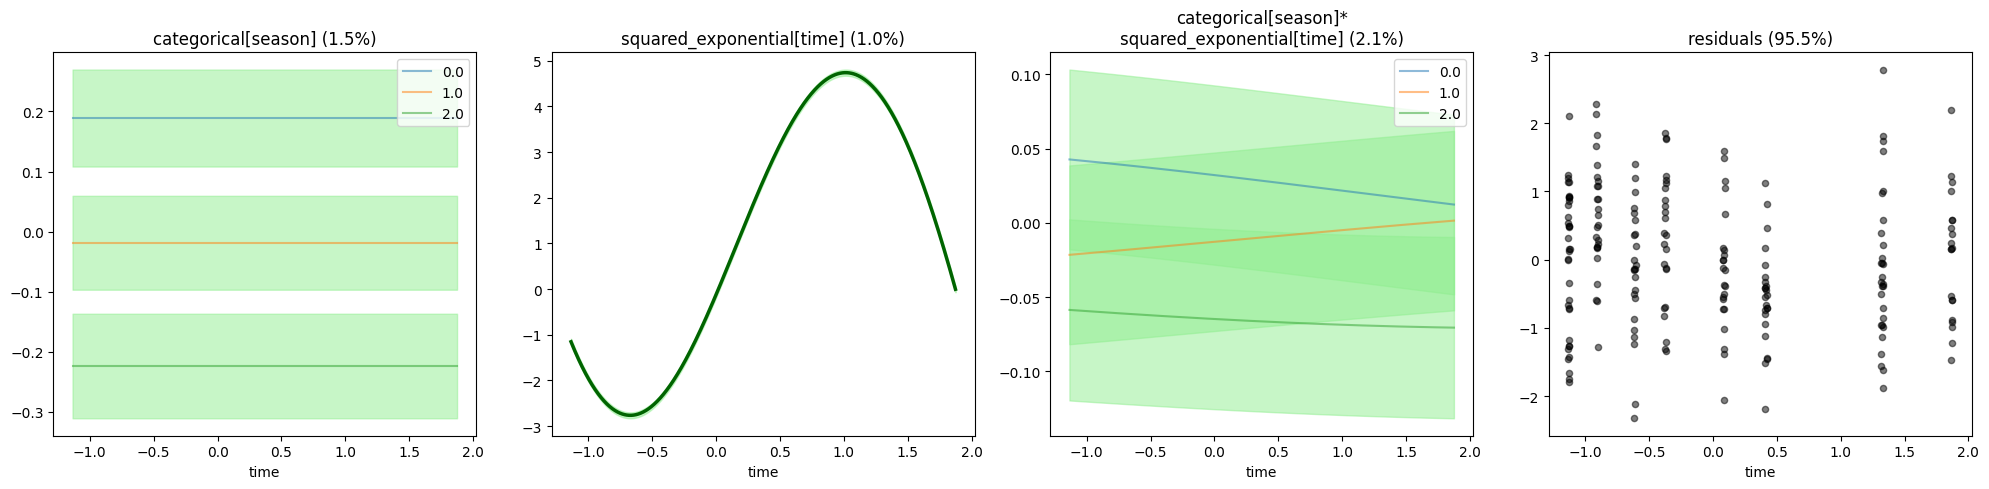

In [13]:
gps_normal.plot_parts(out_label='Zoogloea', x_axis_label='time', sharey=False)


## Stepwise Search Option

In [14]:
# Load GP object
gps_stepwise = model_search.GPSearch(
    X=df[['SEX', 'season', 'time']],
    Y=pd.DataFrame(df['Zoogloea']),
    categorical_vars=['SEX', 'season'],
    outcome_likelihood='zeroinflated_negativebinomial',
)

# Now search over possible model combinations
# Setting the number of iterations lower to make the notebook faster
gps_stepwise.run_search(
    num_jobs=6, 
    random_seed=9102
)

Kernel search: 100%|██████████| 1/1 [00:42<00:00, 42.67s/it]


In [15]:
gps_stepwise.models['Zoogloea']

{'models': {'categorical[1]': {'kernel': <waveome.kernels.Categorical object at 0x29869c070>
╒══════════════════════╤═══════════╤═════════════╤═════════╤═════════════╤═════════╤═════════╤═════════╕
│ name                 │ class     │ transform   │ prior   │ trainable   │ shape   │ dtype   │   value │
╞══════════════════════╪═══════════╪═════════════╪═════════╪═════════════╪═════════╪═════════╪═════════╡
│ Categorical.variance │ Parameter │ Softplus    │ Uniform │ True        │ ()      │ float64 │ 1.24346 │
╘══════════════════════╧═══════════╧═════════════╧═════════╧═════════════╧═════════╧═════════╧═════════╛,
   'model': <gpflow.models.vgp.VGP object at 0x299282040>
╒══════════════════════╤═══════════╤════════════════╤═════════╤═════════════╤═══════════════╤═════════╤═════════════════════════════════════════════╕
│ name                 │ class     │ transform      │ prior   │ trainable   │ shape         │ dtype   │ value                                       │
╞══════════════════════

(<Figure size 2000x500 with 2 Axes>,
 array([[<Axes: title={'center': 'categorical[season] (2.2%)'}, xlabel='time'>,
         <Axes: title={'center': 'residuals (97.8%)'}, xlabel='time'>,
         <Axes: >, <Axes: >]], dtype=object))

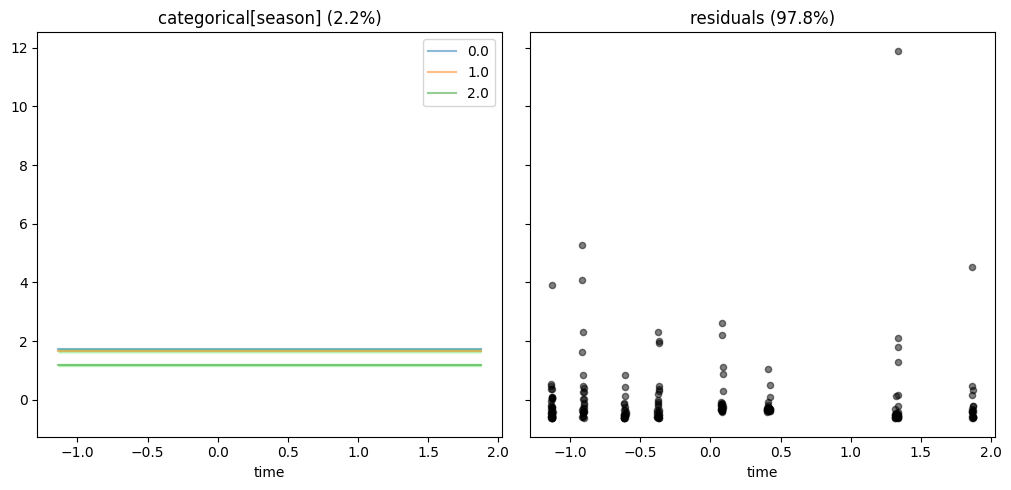

In [16]:
gps_stepwise.plot_parts(out_label='Zoogloea', x_axis_label='time', sharey=False)